In [1]:
import logging
import pickle
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from FINAL_src_CG_basic_HeuristicPricing import ColumnGeneration

In [3]:
def setup_logger(name, log_file, level):

    formatter = logging.Formatter('%(levelname)s %(message)s')
    handler = logging.FileHandler(log_file, mode='w')        
    handler.setFormatter(formatter)

    logger = logging.getLogger(name)
    logger.setLevel(level)
    logger.addHandler(handler)

    return logger

In [4]:
with open('instances_dataset_FINAL.pickle', 'rb') as f:
   instances = pickle.load(f)

with open('rnr_feasible_instances_indexes.pickle', 'rb') as f:
   indexes = pickle.load(f)

In [5]:
# 212	212	50	14	128	5112.915398	TIME_LIMIT_>30min_primal	5747.0	1800.037	GAP	27.0	5150.416215	109.852	NaN

In [6]:
for network_size in indexes:
        
    for idx in indexes[network_size]:
        
    
        i = instances[idx]

        network_filename, network_rp_filename, app_merged, app_merged_rp, app_filenames, app_rp_filenames = i
        print(f"{idx} {len(app_filenames)} apps, {network_rp_filename} {app_merged}")
        

        # try:
        #     instance = Instance.build(
        #         network_filename, 
        #         network_rp_filename, 
        #         app_merged, 
        #         app_merged_rp
        #     )
        # except InfeasibleOnBuilding:
        #     print("INFEASIBLE on building")
        #     continue

        
        logger = setup_logger(f"logger_{idx:03d}", f"logs/id_{idx:04d}.log", logging.DEBUG)
        
        try:
            cg = ColumnGeneration(
                N= len(app_filenames),
                filenames= (
                    network_filename, network_rp_filename, 
                    app_filenames, app_rp_filenames
                ),
                logger= logger
            )
            # result = cg.execute()
            cg.execute()
        except Exception as e:
            print(f"ERROR in ColumnGeneration : {e}")
            raise RuntimeError()
        
        
        # print()
        # print(f"dual {result[0]} primal {result[1]}")

        # CG_DUAL_BOUND[idx] = result[0]
        # CG_PRIMAL_BOUND[idx] = result[1]
        # CG_TIME[idx] = result[2]
    
        print("\n" + "-" * 80 + "\n")

# provare quello corrente generando colonne di inizializzazione o meno
# quello che sta girando ora non le genera

0 2 apps, DATASET_2/networks/network_030_a_rp_0.dat DATASET_2/apps_merged_FINAL/id_0000.dat

STOP, gap < 0.1 %
#iterations 4 LR_dual_bound 410.27598322566024 CG_time 0.263

--------------------------------------------------------------------------------

1 2 apps, DATASET_2/networks/network_030_a_rp_4.dat DATASET_2/apps_merged_FINAL/id_0001.dat

STOP, gap < 0.1 %
#iterations 4 LR_dual_bound 570.2159775190687 CG_time 0.124

--------------------------------------------------------------------------------

2 2 apps, DATASET_2/networks/network_030_a_rp_4.dat DATASET_2/apps_merged_FINAL/id_0002.dat

STOP, gap < 0.1 %
#iterations 8 LR_dual_bound 940.6182873809321 CG_time 0.539

--------------------------------------------------------------------------------

3 3 apps, DATASET_2/networks/network_030_c_rp_0.dat DATASET_2/apps_merged_FINAL/id_0003.dat

STOP, gap < 0.1 %
#iterations 4 LR_dual_bound 694.8298570723482 CG_time 0.361

-----------------------------------------------------------------

RuntimeError: 

[0 1 2 3 4 5 6 7 8 9] [0.18181818 0.16363636 0.14545455 0.12727273 0.10909091 0.09090909
 0.07272727 0.05454545 0.03636364 0.01818182]
1.0
[2 4 3 1 0 0 1 2 7 4]


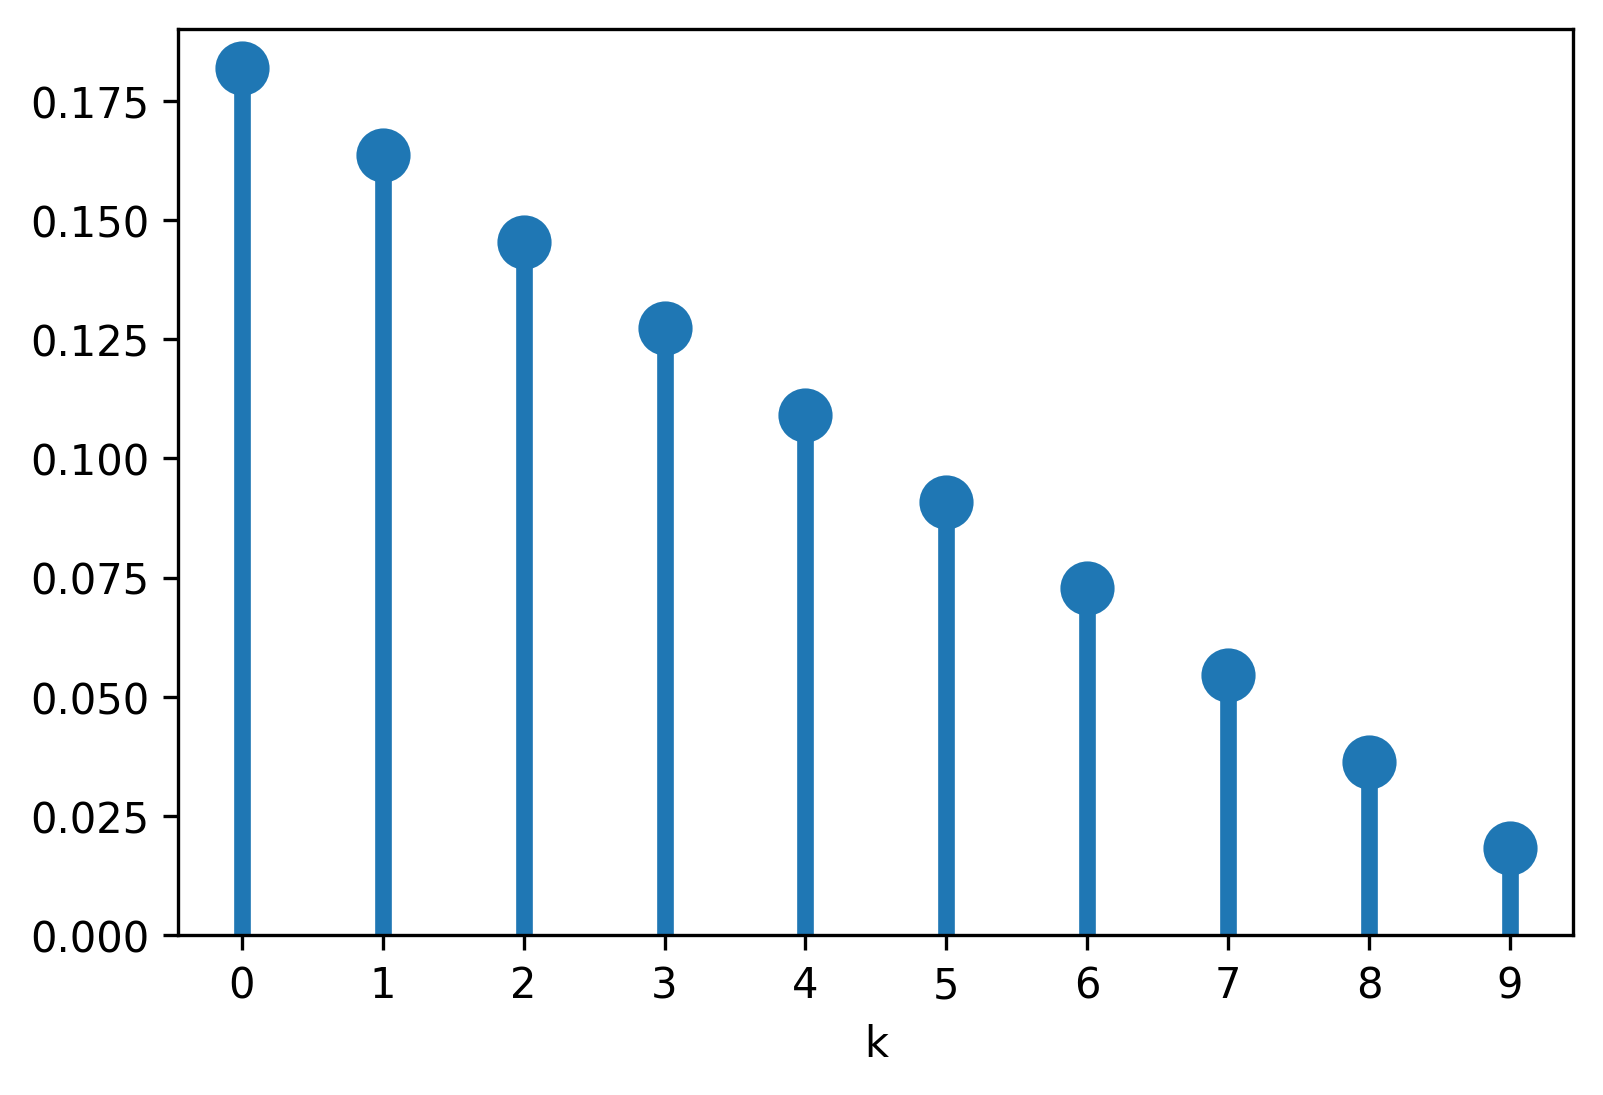

In [ ]:
k = 10
xk = np.arange(k)
pk = -xk+k
pk = pk / np.sum(pk)
print(xk,pk)
print(sum(pk))
custm = stats.rv_discrete(name='custm', values=(xk, pk))

print(custm.rvs(size=10))


fig, ax = plt.subplots(1, 1)
fig.set_dpi(300)
ax.plot(xk, custm.pmf(xk), 'o', ms=12)
ax.vlines(xk, 0, custm.pmf(xk), lw=4)
ax.set_xticks(xk)
ax.set_ylim((0,0.19))
ax.set_xlabel("k")
plt.show()

[0 1 2 3 4 5 6 7] [0.40683324 0.24409994 0.14645997 0.08787598 0.05272559 0.03163535
 0.01898121 0.01138873]
[0 2 2 1 0 0 1 1 0 0]


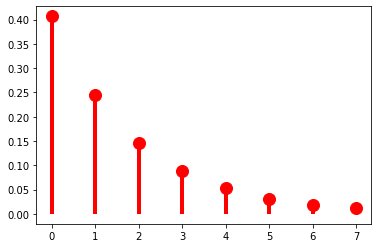

In [ ]:
# 2 3 0.4
# 4

k = 8
xk = np.arange(k)
pk = np.ones(k)
for i in range(1,k):
    pk[i] = pk[i-1]*0.6
pk = pk / np.sum(pk)
print(xk,pk)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

print(custm.rvs(size=10))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()